# Health Information Systems and Decision Support
## WPO 1: Introduction to data analysis and visualization  (16/02/24)

*Jakub Ceranka, Pieter Boonen, Jef Vandemeulebroucke* <br>
*Department of Electronics and Informatics (ETRO)* <br>
*Vrije Universiteit Brussel, Pleinlaan 2, B-1050 Brussels, Belgium*

<font color=blue>Insert students names and IDs here</font>

### Goal
The goal of this practical session is to obtain insight in basic data analysis and data visualization techniques using Jupyter notebook. Basic operations presented today will be very useful during the next practical sessions, where you will need to design and build different decision systems. In this practical session, basic libraries like *pandas*, *matplotlib* and *seaborn* are introduced and applied to the Wisconsin breast cancer data set. Students must send their notebook using Assignment functionality of Canvas using .ipynb __and__ .html format __before 23:59 on the 22th of February__. All practical sessions are graded. Additionally, a general feedback will be provided in the next practical session.

__Hints__ for all practical sessions:
- Make sure that the code is pre-compiled and all output is generated correctly before handing in your notebook
- Pay attention to the layout of your figures (labels, titles, legends, colors,...)
- Chose relevant abbreviations for your variables, make sure your variables are not overwritten
- Read all assignments thoroughly
***
### Jupyter notebook

Jupyter notebook is an open-source application that allows editing and running notebook documents via a web browser. Notebook documents contain both computer code (python) and text elements (paragraphs, equations, figures,...). In this way, notebook files can serve as a complete computational record of a session, interleaving executable code with explanatory text, mathematics, and rich representations of resulting objects. Notebooks may be exported to a range of static formats, including HTML, reStructuredText, LaTeX and PDF. Basic functionalities of the Jupyter notebook are presented [here](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html).
***
### The breast cancer Wisconsin (diagnostic) data set

#### Fine needle aspirate procedure:
The dataset consists of features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. For this type of biopsy technique, a thin hollow needle is inserted into an area of abnormal-appearing tissue for sampling cells. This sample is examined under a microscope which is used in the diagnosis of cancer. FNA is generally considered a safe procedure.
***
#### FNA images:
The image below represents a smear of nuclei of benign and malignant breast mass cells. A difference in shape, size and smoothness of cells is visible.

 ![Image of cells](./FNA_cells.png "FNA_cells")

[<cite>Sizilio et al. 2012</cite>](https://biomedical-engineering-online.biomedcentral.com/articles/10.1186/1475-925X-11-83)
***
#### Features:
In oder to describe the images with numerical values, which can be easily interpreted by a computer, the features term has to be introduced. Features describe characteristics of the nuclei present in the microscopic image. Usually, the more of independent features describing the image, the better.

Each cell nuclei has an independent set of features describing its individual properties:
- ID number of the patient from which the cell was collected.
- The medical diagnosis label assessed by a histologist/oncologist: Malignant or Benign.
- The mean, standard deviation and the 3 worst values of 10 features describing mathematical properties of a cell were computed. This included:
        a) radius (distance from center to points on the perimeter)
        b) texture (standard deviation of gray-scale values)
        c) perimeter
        d) area
        e) smoothness (local variation in radius lengths)
        f) compactness (perimeter^2 / area - 1.0)
        g) concavity (severity of concave portions of the contour)
        h) concave points (number of concave portions of the contour)
        i) symmetry
        j) fractal dimension (a measure of cells self-similarity)
  
Some features were computed automatically using automatic image processing algorithms, and others acquired manually by medical experts. Microscopic images of 569 cells were analyzed and labeled as benign or malignant.
Class distribution: 357 benign, 212 malignant.
***
### Libraries

During this practical session, multiple libraries will be used for the analysis and visualization of data. You can use a different version of libraries, however we recommend the following build:

- [__Pandas__](https://pandas.pydata.org/pandas-docs/stable/tutorials.html):     high performance library used for processing data structures and data analysis. __V 0.22.0__
- [__Numpy__](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html):      library used for scientific computing containing N-dimensional arrays, functions and Fourier transform. __V 1.13.3__
- [__Sci-kit Learn__](http://scikit-learn.org/stable/index.html):     Simple and efficient tools for machine learning and data analysis. __V 0.19.1__
- [__Matplotlib__](https://matplotlib.org/users/pyplot_tutorial.html): plotting library used for the visualization of data from python. __V 2.1.0__
- [__Seaborn__](https://seaborn.pydata.org/):    visualization library based on matplotlib, providing a high-level interface for drawing attractive statistical graphics. __V 0.8.1__

To import any external library, you need to import it using the **import** statement followed by the name of the library and the shortcut. The following code imports Pandas and represents it as 'pd'. You can additionally check for the module version using __version__ command. Information on updating the libraries using Anaconda can be found  [here](http://conda-test.pydata.org/docs/examples/update.html).

In [1]:
import pandas as pd
print(pd.__version__)

2.1.1


***
### Task 1: Importing data  

The provided dataset is represented as the comma-separated values (.csv) file, which stores the tabular data in plain text.

Load the dataset (dataWisconsinBreast.csv) as the dataframe object using Panda's __read_csv__ function and have a look at the data using the __head()__ command. By default, the statement will print out top 5 rows of the dataset.
The __info()__ method is useful to get a quick description of the data, in particular the total number of rows, and each feature's type and number of non-null values.

Hint: To use a command from a library, type the abbreviation of the library followed by a dot and the function  


In [2]:
# YOUR CODE HERE
df = pd.read_csv('dataWisconsinBreast.csv')
print(df.head())
print(df.info())
print(f"\n\n{df.columns}")

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

***
### Task 2: Dataset preprocessing

Lets have a closer look at the dataset. Using inbuilt Pandas function check if the dataset's shape matches with number of cells (rows) and features (columns) provided in the section 'Features'.

__Hint: Something on the index for a column?__

Print the __head()__ of the dataframe again. The first column of the dataset is a random patients ID number which does not bring any clinically relevant information to the dataset. The last column represents NaN (not a number values). Remove these columns from the dataset and check if the shape has decreased accordingly. Additionally, remove all features which do not represent the mean (\_mean) value and assign it to the new dataframe.

The next step is to normalize (min-max scaling) the values. Most machine learning algorithms don't perform well when the numerical input values have very different scales. To rescale the data, we subtract the minimum from every value and divide by the maximum minus the minimum ($\frac{value-min}{max-min}$).

Hint: Use __MinMaxScaler__ from __sklearn__ for the normalization.

Now that the values are all normalized, the name of the features should be changed as well. Add *_N* after each feature using __rename()__ .

Hint: Printing a list with the names of the features will save you some time

You can see that the dataset 'diagnosis' column has either M or B symbol, representing respectively malignant or benign cancer classification label. Split the dataframe into two datasets, representing all benign and malignant rows of features. Does the shapes of new datasets match the dataset class distribution?

Save all three new datasets (cropped with B and M, cropped B and cropped M) as the .csv files in your working directory. Use these normalized datasets for the next tasks.

In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

if df.shape[1] == 33:  # deleting last column (the unnamed one) if it exists
    df.drop('id',  axis=1,  inplace=True)
    df.drop('Unnamed: 32',  axis=1,  inplace=True)


diagnosis_column = df['diagnosis'] # list of Bening and Malignant diagnoses together
features_list = df.columns # list of features' names

filtered_df = df.filter(regex='_mean') # filtering so only the *_mean features remain

df_normalized = scaler.fit_transform(filtered_df) # normalizing the data of the whole dataframe (bening + malignant) -> returns array
df_normalized = pd.DataFrame(df_normalized, columns=filtered_df.columns) # going from numpy array to pd dataframe again

df_normalized = df_normalized.add_suffix("_N") # adding suffix _N to the column names to denote that the values are normalized now

df_normalized.insert(0, 'diagnosis', pd.Series(diagnosis_column)) # inserting diagnosis again so it can be split between B and M

# separating Benign and Malignant classes. Dropping the diagnosis feature -it is not useful since they are fully separated-
df_benign = df_normalized[df_normalized['diagnosis']=='B']
df_benign.drop('diagnosis', axis=1, inplace=True)

df_malignant = df_normalized[df_normalized['diagnosis']=='M']
df_malignant.drop('diagnosis', axis=1, inplace=True)

df_normalized.to_csv("cropped_B_M_normalized.csv", index=False)
df_benign.to_csv("cropped_B_normalized.csv", index=False)
df_malignant.to_csv("cropped_M_normalized.csv", index=False)

print(f"\ndataframe shape: {df.shape} | normalized data shape: {df_normalized.shape}\nbenign normalized shape: {df_benign.shape} | malignant normalized shape: {df_malignant.shape}\n")




dataframe shape: (569, 31) | normalized data shape: (569, 11)
benign normalized shape: (357, 10) | malignant normalized shape: (212, 10)



C:\Users\cesar\AppData\Local\Temp\ipykernel_8144\637517703.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_benign.drop('diagnosis', axis=1, inplace=True)
C:\Users\cesar\AppData\Local\Temp\ipykernel_8144\637517703.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_malignant.drop('diagnosis', axis=1, inplace=True)


***
### Task 3: Dataset statistics

In order to understand the differences and behavior of the data we need to calculate basic statistical values of features. Calculate and print the mean, median, standard deviation and 25th, 75th percentile of the both: malignant and benign dataset for the concavity_mean feature.

Using *pandas* and *matplotlib* library prepare a boxplot of the distribution of the mean radius feature for benign and malignant cells (__Hint:__ concatenate columns of interest and use pandas function boxplot()).

describe() method shows a summary of the numerical attributes for all features.

Hint: In order to plot directly in Jupyter notebook use the following command: %matplotlib inline

mean of concavity_mean for benign: 0.10791382616776794
mean of concavity_mean for malignant: 0.37669802479178083

median of concavity_mean for benign: 0.08690253045923148
median of concavity_mean for malignant: 0.35461574507966254

standard deviation of concavity_mean for benign: 0.10178573347015366
standard deviation of concavity_mean for malignant: 0.175771621017472

25th percentile for benign is 0.04758669165885661
75th percentile for benign is 0.1405576382380506
25th percentile for malignant is 0.2566190253045923
75th percentile for malignant is 0.47574976569821925



,radius_mean_N,texture_mean_N,perimeter_mean_N,area_mean_N,smoothness_mean_N,compactness_mean_N,concavity_mean_N,concave points_mean_N,symmetry_mean_N,fractal_dimension_mean_N
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,0.496087,0.402263,0.494613,0.354136,0.453810,0.385890,0.376698,0.437326,0.438934,0.267904
std,0.151639,0.127814,0.151024,0.156071,0.113824,0.165596,0.175772,0.170844,0.139586,0.159505
min,0.187846,0.022658,0.194251,0.092513,0.190304,0.081805,0.056186,0.100944,0.125253,0.000000
25%,0.383075,0.325245,0.379760,0.238303,0.373567,0.276731,0.256619,0.321173,0.343687,0.139796
50%,0.489564,0.397362,0.486559,0.334464,0.447504,0.346512,0.354616,0.428827,0.423737,0.244629
75%,0.596763,0.475313,0.595225,0.449735,0.526271,0.469358,0.475750,0.512798,0.524495,0.360468
max,1.000000,1.000000,1.000000,1.000000,0.831182,1.000000,1.000000,1.000000,1.000000,1.000000


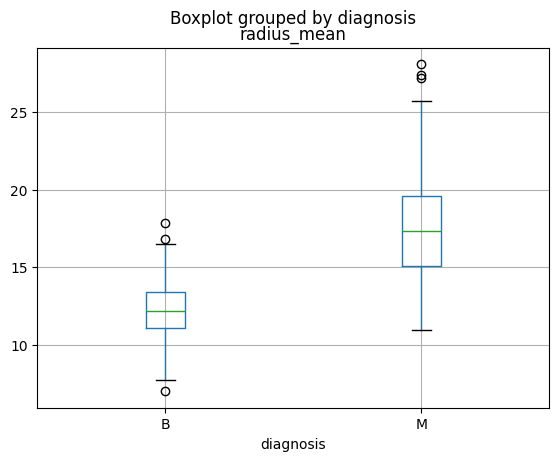

In [7]:
## Basic statistical values
# mean
mean_benign = df_benign.loc[:, 'concavity_mean_N'].mean()
mean_malignant = df_malignant.loc[:, 'concavity_mean_N'].mean()

print(f"mean of concavity_mean for benign: {mean_benign}\nmean of concavity_mean for malignant: {mean_malignant}\n")

# median
median_benign = df_benign.loc[:, 'concavity_mean_N'].median()
median_malignant = df_malignant.loc[:, 'concavity_mean_N'].median()

print(f"median of concavity_mean for benign: {median_benign}\nmedian of concavity_mean for malignant: {median_malignant}\n")

# standard deviation
std_benign = df_benign.loc[:, 'concavity_mean_N'].std()
std_malignant = df_malignant.loc[:, 'concavity_mean_N'].std()

print(f"standard deviation of concavity_mean for benign: {std_benign}\nstandard deviation of concavity_mean for malignant: {std_malignant}\n")

# percentile
perc_25_benign = df_benign.loc[:, 'concavity_mean_N'].quantile(0.25)
perc_75_benign = df_benign.loc[:, 'concavity_mean_N'].quantile(0.75)

perc_25_malignant = df_malignant.loc[:, 'concavity_mean_N'].quantile(0.25)
perc_75_malignant = df_malignant.loc[:, 'concavity_mean_N'].quantile(0.75)

print(f"25th percentile for benign is {perc_25_benign}\n75th percentile for benign is {perc_75_benign}")
print(f"25th percentile for malignant is {perc_25_malignant}\n75th percentile for malignant is {perc_75_malignant}\n")

## Boxplot
df.boxplot('radius_mean', by='diagnosis')
#df_malignant.boxplot('radius_mean', by='Malignant')
#pd.concat([df_benign,df_malignant]).boxplot(column='radius_mean')#,by='urban')

## Describe method
df_malignant.describe()
#df_benign.describe()

Can you already spot the differences in data distributions between benign and malignant cancer? What conclusions regarding the size and shape of malignant vs benign cells can be drawn?

***
### Task 4: Visualization of nuclei features

Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). Using *matplotlib* plot a histogram of a mean radius of malignant cancer cells. On the same figure add a histogram (using a different color) of benign cancer cells radius (Hint: use *matplotlib* function hist() ). Do the histograms correlate with each other?

Histogram is a great tool to visualize the distribution of a single feature. However, often a dataset consists of several features and therefore another way of visualization has to be used.

A 2D scatterplot shows a relation between two features. Scatterplots are very often used to get a feeling of the data and work as a help tool for choosing a correct design of decision system which you will build during the next practical sessions.

Using *matplotlib*, plot on the same figure the relation of the radius_mean feature in function of the texture_mean feature for benign and malignant cases. Mark classes with different color and provide a legend box.

Scatterplots give a possibility to analyse the trends and relations between different features. Looking at the plotted scatterplot, you can see that there seem to be a linear relation between radius and texture. Lets try to find it.

Using linear regression from Sci-Kit learn toolbox, fit a linear function and plot it on the same scatterplot. Give the formula of the linear function.

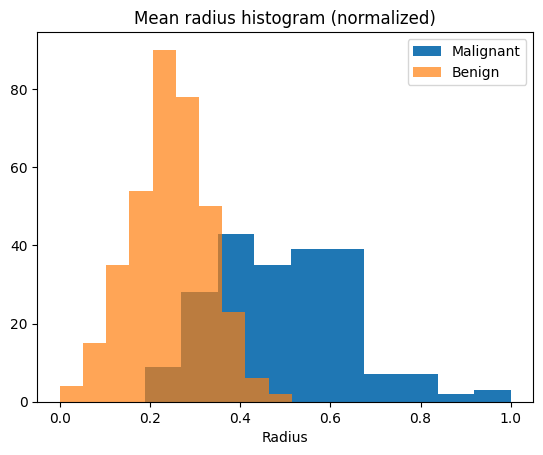

ValueError: Expected 2D array, got 1D array instead:
array=[0.37571863 0.12039229 0.19918837 0.323977   0.34223876 0.29015894
 0.22421373 0.43354751 0.42948935 0.35407508 0.71051742 0.13358133
 0.3222861  0.25160636 0.22455191 0.28610078 0.23571187 0.24619547
 0.50084545 0.39736219 0.45350017 0.25667907 0.15387217 0.26276632
 0.30875888 0.24484275 0.31687521 0.31484613 0.36117687 0.45248563
 0.21373013 0.3432533  0.45924924 0.299628   0.30571525 0.21981738
 0.24923909 0.24721001 0.30267163 0.42576936 0.24416638 0.25498816
 0.62529591 0.54210348 0.17822117 0.3814677  0.17720663 0.30808252
 1.         0.29117349 0.27088265 0.03990531 0.33040243 0.21812648
 0.4163003  0.15995942 0.17653027 0.10821779 0.26682448 0.29455529
 0.34223876 0.39059858 0.29692256 0.40480216 0.18025025 0.3361515
 0.30064254 0.23638823 0.29996618 0.21339195 0.40886033 0.21339195
 0.22590463 0.27663172 0.42543118 0.48461278 0.29015894 0.12580318
 0.58741968 0.51673994 0.39127494 0.51707812 0.31247886 0.35644234
 0.11396686 0.49814001 0.62631045 0.43997295 0.30977342 0.30571525
 0.45722016 0.3344606  0.35170781 0.67974298 0.31214068 0.38755495
 0.23537369 0.32566791 0.72404464 0.41021305 0.14575583 0.45654379
 0.26411904 0.11903957 0.26580994 0.37368955 0.10585052 0.32600609
 0.33987149 0.33412242 0.38214406 0.26445722 0.11836321 0.27494082
 0.23774095 0.24653365 0.23233006 0.56002705 0.17754481 0.45620561
 0.52384173 0.425093   0.39905309 0.3902604  0.32702063 0.07034156
 0.27494082 0.16706121 0.15285763 0.30402435 0.32160974 0.3084207
 0.41799121 0.28779168 0.22658099 0.24146094 0.39803855 0.51031451
 0.5836997  0.07642881 0.28373351 0.33243152 0.0923233  0.39634765
 0.43151843 0.31552249 0.39567129 0.31755157 0.10990869 0.30064254
 0.6445722  0.21846466 0.48224552 0.52079811 0.33682787 0.33310788
 0.08488333 0.26208996 0.47548191 0.14034494 0.32566791 0.52147447
 0.24450457 0.53364897 0.0906324  0.3361515  0.21981738 0.08319242
 0.16672303 0.39567129 0.40818397 0.4808928  0.23233006 0.62123774
 0.42306392 0.28271897 0.44639838 0.14778492 0.28779168 0.24112276
 0.30639161 0.42069665 0.20290835 0.46635103 0.35678052 0.26276632
 0.19039567 0.28542442 0.36557322 0.60534325 0.19986473 0.17754481
 0.19208657 0.12445046 0.24146094 0.1602976  0.36692594 0.14271221
 0.0226581  0.48156916 0.18701387 0.36557322 0.3676023  0.28677714
 0.24822455 0.41359486 0.21846466 0.49036185 0.40209672 0.57017247
 0.53601623 0.58978695 0.49949273 0.22590463 0.28238079 0.25059182
 0.62326682 0.50152181 0.66351031 0.57997971 0.42069665 0.27832262
 0.22624281 0.12106865 0.17314846 0.44132567 0.27798444 0.34190057
 0.1481231  0.31044978 0.11599594 0.14169767 0.47480555 0.46838011
 0.20257017 0.20358471 0.19445384 0.34731146 0.28035171 0.49239094
 0.20459926 0.51065269 0.28643896 0.07372337 0.08927968 0.14879946
 0.51335813 0.39431857 0.32769699 0.57118701 0.35441326 0.16909029
 0.20257017 0.17619209 0.526209   0.1376395  0.58674332 0.26445722
 0.37098411 0.49983091 0.22353737 0.10720325 0.34595874 0.2962462
 0.16638485 0.35644234 0.10145418 0.51640176 0.14710856 0.70713561
 0.20798106 0.11464322 0.33513696 0.2177883  0.28610078 0.18261752
 0.42002029 0.52553263 0.66215759 0.03415624 0.76969902 0.174163
 0.37368955 0.20189381 0.43388569 0.10990869 0.37166047 0.43050389
 0.18498478 0.34731146 0.32499155 0.21508285 0.24112276 0.2056138
 0.34223876 0.29117349 0.33141698 0.22928644 0.40480216 0.36083869
 0.62563409 0.21203923 0.27764626 0.35847142 0.3902604  0.35745688
 0.04058167 0.56679067 0.03753805 0.33547514 0.38180588 0.37707136
 0.20121745 0.18498478 0.29218803 0.19039567 0.34866419 0.18397024
 0.26208996 0.31552249 0.43050389 0.81501522 0.45924924 0.400744
 0.3432533  0.27730808 0.3659114  0.23368279 0.31044978 0.17653027
 0.31822793 0.05309435 0.25972269 0.16841393 0.42306392 0.08657423
 0.28779168 0.26580994 0.32972607 0.8065607  0.35238417 0.62056138
 0.16909029 0.37301319 0.38112952 0.39736219 0.18227934 0.15657761
 0.42035847 0.43422388 0.31653703 0.33243152 0.48156916 0.27629354
 0.12614136 0.26919175 0.40209672 0.48123098 0.33648969 0.3466351
 0.15049036 0.40919851 0.57355428 0.31112614 0.41494758 0.25532634
 0.18397024 0.61954684 0.1707812  0.26750085 0.58978695 0.41224214
 0.25870815 0.43625296 0.37064592 0.30639161 0.34697328 0.39972946
 0.41156578 0.47683463 0.17145756 0.28102807 0.29252621 0.51403449
 0.10551234 0.48393642 0.32465336 0.39228948 0.37199865 0.2979371
 0.35475144 0.31856611 0.40175854 0.5312817  0.1271559  0.20257017
 0.52113629 0.36557322 0.26547176 0.28846804 0.42881299 0.
 0.18058843 0.48224552 0.61210687 0.40006764 0.16503213 0.29151167
 0.31078796 0.41258032 0.30740615 0.68515387 0.45147109 0.17010484
 0.25363544 0.56070342 0.21508285 0.19580656 0.14169767 0.40547853
 0.28204261 0.37301319 0.45045654 0.19783564 0.13966858 0.24484275
 0.12208319 0.22387555 0.1166723  0.21068651 0.19411566 0.32532973
 0.45654379 0.14440311 0.30334799 0.18599932 0.20696652 0.17653027
 0.17788299 0.40615489 0.3554278  0.27257355 0.61345959 0.25769361
 0.38248225 0.20223199 0.50625634 0.26885357 0.23537369 0.2404464
 0.50659452 0.33885695 0.29387893 0.28643896 0.34020967].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [25]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Histogram of the mean radius (normalized) for borth Benign and Malignant types
plt.hist(df_malignant['radius_mean_N'], label='Malignant')
plt.hist(df_benign['radius_mean_N'], alpha=0.7, label='Benign')
plt.legend()
plt.title('Mean radius histogram (normalized)')
plt.xlabel('Radius')

plt.show()

# Scatter plot of mean radius in function of mean texture for both Benign and Malignant types. Plot includes linear regression
combined_data_texture = list(df_benign['texture_mean_N'])+list(df_malignant['texture_mean_N']) # x
combined_data_radius = list(df_benign['radius_mean_N'])+list(df_malignant['radius_mean_N']) # y

X_train, X_test, y_train, y_test = train_test_split(combined_data_texture, combined_data_radius, test_size=0.2, random_state=30)

# regression = LinearRegression()
# regression.fit(X_train, y_train) # train model using train data
# y_prediction = regression.predict(X_test)

# coefficients = regression.coef_

# # plotting scatter + regression 
# plt.scatter(df_benign['texture_mean_N'], df_benign['radius_mean_N'], label="Benign")
# plt.scatter(df_malignant['texture_mean_N'], df_malignant['radius_mean_N'], label="Malignant", alpha=0.7)
# plt.plot(X_test, y_prediction, color='red')
# plt.title("Mean texture vs Mean Radius")
# plt.xlabel("Texture mean")
# plt.ylabel("Radius mean")
# plt.legend()

# plt.show()



***
### Task 5: High-level visualization

A scatter plot is a good tool to visualize the distribution of values for small number of instances. However, with very large numbers of instances, all plotted points tent to become inseparable, forming one large cluster of the same color intensity. That issue can be solved by introduction of density plots. Density plot represents data in the same way as the scatterplot, but it changes its density dependent on the number of points in its vicinity. Using *seaborn* library and *kdeplot* function, plot a density plot of the same features (radius in function of texture) for two class labels (benign and malignant) on the same figure. You can easily see that it is much easier now to interpret and separate features.

You have plotted the relation between two features now, but what about all of the others. They probably contain additional relevant information for better understanding of the dataset. *Pandas* library provides an inbuilt function *scatter_matrix*, which shows a relations between all inputed features simultaneously. Use a complete dataset to create a scatter_matrix plot.

Additionally to the graphical representation of feature pairs, numbers can be generated too. Use *pandas* *corr()* function to investigate correlations of radius_mean feature.
What can you say about the relation between radius_mean against different features? Are some features dependent on another? If so, which? Is it worth to use all of the features in your future machine learning system, why?

KDE plots are compute intense. If it takes too long to generate one on a whole dataset, use its fraction instead (e.g. use *pandas.sample frac 10%*).


YOUR ANSWER HERE


You can now see the features distribution, but we can not distinguish which point in the provided scatter matrix corresponds to which class. Using *seaborn's pairplot* function print the scatter matrix of radius, texture and concavity for malignant and benign cells.

Could you print the same plot (radius, texture & concavity for malignant and benign cells) but instead of a seaborn scatterplot matrix (pairplot) use density distribution matrix (kdeplot matrix)?

In [ ]:
# YOUR CODE HERE


### Task 6: Validation of classifier's performance
Load prediction.csv file. The file stores support-vector machine classifier results for each instance in the dataset (classes malignant or benign). Inspect the prediction dataframe. Extract a column predicted from the prediction.csv dataset and column 'diagnosis' from the initial dataset (dataWisconsinBreast.csv) and store them in new dataframes.

We are now going to assess the performance of the classifier. Write a python function counting and returning false positive, false negative, true positive and true negative instances. Using obtained statistical values, calculate accuracy, sensitivity, specificity of the classifier.

Scikit-learn library provides functions such as *metrics.classification_report*, which calculate and printout the same measures. See the Classification metrics section of the user guide for further details. Does the output of the scikit-learn functions match the ones calculated by you?

Briefly describe the difference between calculated measures.
During classification of breast biopsies, it is highly important not to miss a malignant case. In other words, we do not want our classifier to classify malignant cell as benign case. The performance of the classifier can be optimized towards such behavior. Which statistical measure should we optimize (increase) in order to decrease these wrong classifications as much as possible?

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
